# Podstawy Sztucznej Inteligencji 2020/2021


Prosze uzupelnic kod tam gdzie znajduje napis `YOUR CODE HERE` lub 'YOUR ANSWER HERE'.

Warto zresetowac 'kernel' i sprawdzic czy caly notatnik uruchamiany od poczatku nie daje bledow.

---

## MNIST 

MNIST jest dużym zbiorem ręcznie pisanych cyfr.

https://en.wikipedia.org/wiki/MNIST_database


**UWAGA**

We wszystkich ćwiczeniach zmierz czas potrzebny do wykonania funkcji `fit` i `score`. (line magic `%time`) 

Wyciągnij wnioski nt. skuteczności klasyfikatorów o ich wydajnosci obliczeniowej.

In [1]:
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from __future__ import print_function
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import datasets

### Wczytanie danych MNIST

Jest wiele sposobów załadowania danych mnist do pamięci. Możemy skorzystać z funkcji `fetch_openml`.




In [3]:
from sklearn.datasets import fetch_openml
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)
#mnist=fetch_openml('mnist_784', version=1)

In [4]:
X.dtype,y.shape

(dtype('float64'), (70000,))

In [5]:
np.prod(X.shape)/1024**2

52.337646484375

### Zadanie 1.

Dokonaj podziału danych i etykiet na dwa zbiory - trenujący i testowy o rozmiarach odpowiednio `60000` i `10000`.

In [6]:
#train, test, train_labels, test_labels = train_test_split(X.asytype(np.float32), y, test_size=1/7., random_state=42)

x = X.astype(np.float32)
train, test, train_labels, test_labels = train_test_split(x, y, test_size=1/7, random_state=42)

print(train[123].dtype)

print('train:', train.shape)
print('test:', test.shape)

float32
train: (60000, 784)
test: (10000, 784)


In [7]:
assert train.shape == (60000, 784)
assert test.shape == (10000, 784)
assert train_labels.shape == (60000,)
assert test_labels.shape == (10000,)
assert train[123].dtype == np.float32
assert train[123].shape == (784,)

### Zadanie 2.

Wyświetl dla losowego przykładu etykietę oraz cyfrę. Zauważ, że cyfry są obrazkami `28x28`.

etykieta: 4


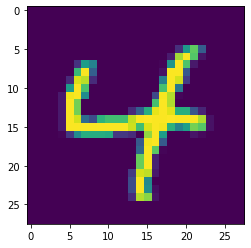

In [8]:
import random
i = random.randint(0, len(train))

print('etykieta:', train_labels[i])
plt.imshow(train[i].reshape(28, 28))

## MNIST - linear model

Zastosuj `LogisticRegression`:

 - zestaw danych MNIST jest duży dla tej metody i obliczenia mogą trwać długo. 
 - przeskaluj obrazki i wybierz zestaw 

 

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(train)  # wyznacza parametry na danych treningowych

scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

reduced_train = scaled_train[:1000]
reduced_train_labels = train_labels[:1000]

In [10]:
np.testing.assert_almost_equal( np.mean(scaled_train,axis=0), 0.0,decimal=5)
np.testing.assert_almost_equal( np.std(scaled_train,axis=0)[np.std(scaled_train,axis=0)>0],1.0,decimal=3)
assert reduced_train.shape == (1000,28**2)
assert reduced_train_labels.shape == (1000,)

Trening wykonamy na 1000 pierwszych przykładów:
     
    clf.fit(reduced_scaled_train,reduced_train_labels)
    
 - UWAGA - dla wszystkich przykładów można  zredukować tolerację:  `solver='sag'` i `tol=0.1`
 

In [11]:
clf = LogisticRegression(multi_class='ovr', solver='saga', tol=0.1)
clf.fit(reduced_train, reduced_train_labels)

score = clf.score(scaled_test, test_labels)
print(score)

0.8113


In [12]:
assert score>0.8

Spróbuj wykonać to samo na obrazkach przeskalowanych z zachowaniem proporcji: 

    scaled_test = test/255
    scaled_train = train/255
    
Czy wynik jest lepszy?    

In [13]:
scaled2_test = test/255
scaled2_train = train/255

clf = LogisticRegression (multi_class='ovr', solver='sag', tol=0.1)
clf.fit(reduced_train, reduced_train_labels)

score = clf.score(scaled2_test, test_labels)
print(score)

0.7166


## PCA

Wykonaj redukcję PCA do np. 54 cech na cechach przeskalowanych z zachowaniem proporcji:

    scaled_test = test/255
    scaled_train = train/255
    

Wykorzystaj metodę `.inverse_transform`  by otrzymać rekontrukcję orginałów w orginalnej przetrzeni ($28^2$). Narysuj orginały i rekonstrukcję.

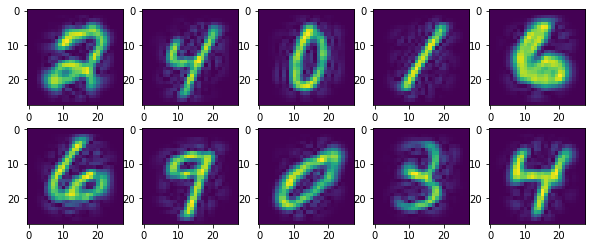

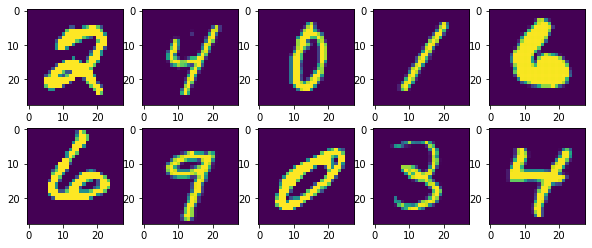

In [14]:
from sklearn.decomposition import PCA

def plot10(x, **args):
    f, ax = plt.subplots(2, 5, figsize=(10, 4))
    for i, c_ in enumerate(x):
        ax.ravel()[i].imshow(np.abs(c_).reshape(28, 28), **args ) 
    plt.show()

pca = PCA(54).fit(train/255)
pca_train = pca.transform(train)
pca_test = pca.transform(test)

plot10(pca.inverse_transform(pca_train[:10]))
plot10(train[:10])

Wykonaj regresję logistyczną dla 54 wymiarowych danych otrzymanych w poprzednim punkcie:

In [15]:
clf = LogisticRegression(multi_class='ovr', solver='sag', tol=0.1)
clf.fit(pca_train, train_labels)

score_pca = clf.score(pca_test, test_labels)
print(score_pca)

0.8946


In [16]:
assert score_pca > 0.85

In [17]:
# %time clf.fit(pca_train,train_labels)
# %time score_pca = clf.score(pca_test,test_labels)
# %time print(score_pca)

## Perceptron 

In [18]:
from sklearn.linear_model import Perceptron

perceptron = Perceptron()
perceptron.fit(train, train_labels)

score_perceptron = perceptron.score(test, test_labels)
print(score_perceptron)

0.8819


In [19]:
assert score_perceptron > 0.85

## MNIST z klasyfikatorem kNN

Korzystając z pakietu `sklearn` poklasyfikuj dane MNIST.

*UWAGA* -  testowanie klasyfikatora wymaga kilku sekund na 100 przykładów. Dlatego funkcje: `clf.score` i `clf.predict` należy wywoływać na podziorze danych testujących lub liczyć się z długim czasem działania. 

In [20]:
#k=3,5,7

knn = KNeighborsClassifier(n_neighbors=7).fit(train, train_labels)

score_knn = knn.score(test[:100], test_labels[:100])
print(score_knn)

0.98


In [21]:
assert score_knn>0.9

### Analiza błędów 

Znajdź przykłady (np. 10 sztuk) dla których klasyfikator się pomylił. Zastanów się czy człowiek też mógłby się pomylić w tych przypadkach.

predict: ['4'] label: 9


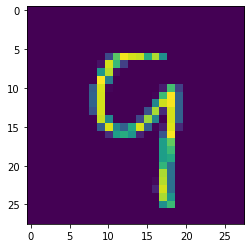

predict: ['7'] label: 9


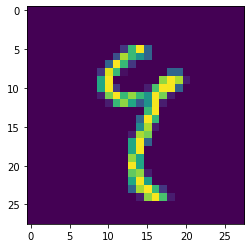

In [22]:
for i in range(100):
    Z = knn.predict(test[i:i+1])
    P = test_labels[i]
    
    if Z != P:
        print('predict:', Z, 'label:', P)
        plt.imshow(test[i].reshape(28, 28))
        plt.show()

##  MNIST z klasyfikatorem SVM

Poklasyfikuj dane MNIST klasyfikatorem SVM, korzystając z implementacji `sklearn` 

 - należy zastosować skalowanie danych (np. `preprocessing.StandardScaler`)
 - warto zacząć eksperymenty od `1000` przykładów trenujących. Trenowanie SVM jest wolne.

In [23]:
from sklearn import svm
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler(with_std = True)
scaler.fit(train[:1000])
#scaler.transform(train)

clf = svm.SVC(decision_function_shape='ovo', kernel='rbf', gamma='auto')
clf.fit(scaler.transform(train[:1000]), train_labels[:1000])
clf.score(scaler.transform(test), test_labels)

0.8645

##  MNIST z klasyfikatorem SVM w zredukowanej przestrzeni danych (PCA)

Wykonaj redukcję danych z pomocą PCA, np.:

    pca = decomposition.PCA(n_components=35, whiten=True,\
                            svd_solver='randomized')
                            
                            
                            
 - Zmniejszając wymiar przestrzeni można pokusić się o zwiększenie zbioru trenującego.
 - Przeczytaj co oznacza `whiten`.

In [ ]:
from sklearn import decomposition

pca = decomposition.PCA(n_components=35, whiten=True, svd_solver='randomized')

pca.fit(train)
train_pca = pca.transform(train)
test_pca = pca.transform(test)

clf.fit(train_pca, train_labels)

svm_score = clf.score(test_pca, test_labels)

print(svm_score)

In [ ]:
assert svm_score > 0.97